In [7]:
import pandas as pd
import numpy as np

import re

import geopandas as gpd
import folium

from shapely.geometry import polygon, multipolygon

from arcgis.gis import GIS

In [21]:
bangalore_geom = gpd.read_file('data/Bangalore.geojson') # (f'data/{trimmed_city_name}_grid.geojson')
bangalore_geom

,geometry
0,"POLYGON ((77.46010 12.90384, 77.46022 12.90045..."


In [22]:
def get_primary_bounds(geojson_df):
    for g in geojson_df['geometry']:
        if g and type(g) in (polygon.Polygon, multipolygon.MultiPolygon):
            return g
    return None

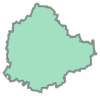

In [23]:
bangalore_bounds = get_primary_bounds(bangalore_geom)
bangalore_bounds

In [25]:
bangalore_bounds.area

0.059216577001034866

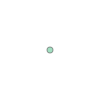

In [26]:
bangalore_bounds.centroid

In [28]:
re.match(r"coffee", str("Coffee shop").lower())

<re.Match object; span=(0, 6), match='coffee'>

In [34]:
def get_coffee_spots(venues_df):
    ven = venues_df['Venue']
    cat = venues_df['Venue Category']
    
    return re.match(r"coffee", str(ven).lower()) is not None\
        or re.match(r"cafe$", str(ven).lower()) is not None\
        or re.match(r"coffee", str(cat).lower()) is not None\
        or re.match(r"cafe$", str(cat).lower()) is not None

In [9]:
bangalore_venues = pd.read_csv('data/Bangalore_grid_venues.csv', index_col=0)\
                    .drop(['City', 'Grid Item'], axis=1)\
                    .reset_index(drop=True)
bangalore_venues

,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Maheshwari Farms,Farm,12.891594,77.485173
1,"Girls common room,rrmch",College Cafeteria,12.898385,77.463837
2,Titan Eye+,Optical Shop,12.899838,77.481672
3,"Pediatrics dept,RRMCH",Medical School,12.898220,77.463707
4,Nice Road Junction,Road,12.898644,77.464273
...,...,...,...,...
14945,Sri Sai Palace,South Indian Restaurant,13.006801,77.757480
14946,Singh Samosa & Sweets,Chaat Place,13.004507,77.753930
14947,Subway,Sandwich Place,13.007540,77.755079
14948,RxDx,Hospital,13.003042,77.757113


In [37]:
bangalore_venues["Venue Category"].value_counts()

Indian Restaurant                           930
Residential Building (Apartment / Condo)    720
Office                                      696
Bank                                        411
Café                                        298
                                           ... 
Vineyard                                      1
Private School                                1
Football Stadium                              1
Toll Plaza                                    1
Prayer Room                                   1
Name: Venue Category, Length: 509, dtype: int64

In [35]:
bangalore_coffee = bangalore_venues.apply(lambda v: get_coffee_spots(v), axis=1)
bangalore_coffee # [is_bangalore_coffeeshop == True]

0        False
1        False
2        False
3        False
4        False
         ...  
14945    False
14946    False
14947    False
14948    False
14949    False
Length: 14950, dtype: bool

In [36]:
b_c = bangalore_venues[bangalore_coffee]
b_c

,Venue,Venue Category,Venue Latitude,Venue Longitude
198,Cafe Coffee Day,Coffee Shop,12.928837,77.518455
228,CAFE COFFEE DAY,Coffee Shop,12.936047,77.517823
312,The Coffee Shack,Coffee Shop,12.933087,77.540376
317,vyshnavi condiments,Coffee Shop,12.934045,77.539932
344,coffee and cue,Pool Hall,12.961213,77.511131
...,...,...,...,...
14249,Chaipatty Teafe,Coffee Shop,12.956033,77.729216
14305,Gloria Jean's coffee sigma soft tech park,Coffee Shop,12.958772,77.743713
14642,Third Wave Coffee Roasters,Coffee Shop,12.990104,77.729060
14654,Coffee Tree,Coffee Shop,12.989367,77.728424


In [38]:
bangalore_coffee.to_csv('data/coffee/bangalore.csv')

In [38]:
b_not_c = bangalore_venues[~bangalore_coffee]
b_not_c

,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Maheshwari Farms,Farm,12.891594,77.485173
1,"Girls common room,rrmch",College Cafeteria,12.898385,77.463837
2,Titan Eye+,Optical Shop,12.899838,77.481672
3,"Pediatrics dept,RRMCH",Medical School,12.898220,77.463707
4,Nice Road Junction,Road,12.898644,77.464273
...,...,...,...,...
14945,Sri Sai Palace,South Indian Restaurant,13.006801,77.757480
14946,Singh Samosa & Sweets,Chaat Place,13.004507,77.753930
14947,Subway,Sandwich Place,13.007540,77.755079
14948,RxDx,Hospital,13.003042,77.757113


In [4]:
gis = GIS()

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
bangalore_map = gis.map('Bangalore')
bangalore_map

In [2]:
# boston_map = folium.Map(location=[42.3,-71],zoom_start=10)
# boston_map